In [26]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# load dataset
def fun(filename):

  dataframe = pandas.read_table(filename)
  data = dataframe.drop("No.", axis=1)
  dataset = dataframe.values

#print(data)

# split into input (X) and output (Y) variables

  l = len(dataframe)
#l = 18565 + 659
  X = dataset[0:l,1:]
# Y = dataset[100:200, 1:10]
# print(X)
# print(X.shape)
  labels = []
  for i in range (0,l):
    if X[i][9] == 'T':
      labels.append(0)
    else:
      labels.append(1)

  features = X[0:l,0:9]




# Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
  gnb = nb.GaussianNB() #here we need to chanfge

# Train our classifier
  model = gnb.fit(train, train_labels)

  preds = gnb.predict(test)
  cm = confusion_matrix(test_labels, preds)


  return cm.T


cm_dos = fun('/content/complete_dos1.txt')
print(cm_dos)
cm_fuzzy = fun('/content/complete_fuuzy1.txt')
print(cm_fuzzy)

cm_spoof = fun('/content/complete_spoof1.txt')
print(cm_spoof)



[[10290    22]
 [   26  1837]]
[[10227    11]
 [   11  2212]]
[[9875  406]
 [  36 3436]]


In [27]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def fun2(filename):

# load dataset
#File name change for replay and mixedone
  dataframe = pandas.read_table(filename)
  data = dataframe.drop("No.", axis=1)
  data = data.drop("StdPageRank", axis=1)
  data = data.drop("VarPageRank", axis=1)

  X = data.values


# split into input (X) and output (Y) variables

#l = 36893 
  l = len(dataframe)


  labels = []
  for i in range (0,l):
    if X[i][9] == True or X[i][9] == 'R':
      labels.append(0)
    else:
      labels.append(1)




  features = data.iloc[:,0:9]








# Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
  nb1 =nb.GaussianNB() 


  # Train our classifier
  nb1.fit(train, train_labels)
  preds = nb1.predict(test)
  
  # Evaluate accurac
  print(accuracy_score(test_labels, preds))
  print(test_labels.count(0))
  print(test_labels.count(1))
  cm = confusion_matrix(test_labels, preds)

  return cm.T

cm_replay = fun2('/content/AttackFreeGraphImpersion_GraphFeatures.txt')
print(cm_replay)


0.933502538071066
7006
6784
[[6105   16]
 [ 901 6768]]


In [28]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
#File name change for replay and mixedone
dataframe = pandas.read_table('/content/mixedGraph_GraphFeatures_200.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)






# df = pd.DataFrame(data)

# corrMatrix = df.corr()
# print (corrMatrix)

# split into input (X) and output (Y) variables


l = len(dataframe)
X = data.values

labels = []
for i in range (0,l):
  if X[i][9] == 'R':
    labels.append(0)
  else:
    labels.append(1)




features = data.iloc[:,0:9]



print(labels.count(0))
print(labels.count(1))




# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
nb =nb.GaussianNB()


  # Train our classifier
nb.fit(train, train_labels)
preds = nb.predict(test)
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))
print(test_labels.count(0))
print(test_labels.count(1))
cm_mixed = confusion_matrix(test_labels, preds)
cm_mixed = cm_mixed.T
print(cm_mixed)

58834
23663
0.9619834710743802
19530
7695
[[18536    41]
 [  994  7654]]


In [24]:
cm = np.array((cm_dos,cm_fuzzy,cm_spoof,cm_replay,cm_mixed,cm_dos+cm_fuzzy+cm_spoof+cm_replay+cm_mixed))
print(cm)

def pre_re_call(cm):
  tp = cm[0][0]
  tn = cm[1][1]
  fp = cm[0][1]
  fn = cm[1][0]

  re = tp/(tp+fn)
  pr = tp/(tp+fp)
  f1 = 2*pr*re/(pr+re)
  acc = (tp+tn)/(tp+tn+fp+fn)


  return str(pr),str(re),str(f1),str(acc)




[[[10316    35]
  [    0  1824]]

 [[10238   104]
  [    0  2119]]

 [[ 9911   417]
  [    0  3425]]

 [[ 5998    24]
  [ 1008  6760]]

 [[19514  2439]
  [   16  5256]]

 [[55977  3019]
  [ 1024 19384]]]


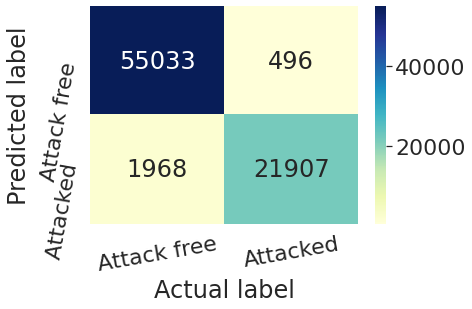

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline
cmD = cm  #Giving the index

cm_matrix = pd.DataFrame(data=cmD, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_overall.pdf', bbox_inches = "tight")
plt.savefig('confusion_overall.PNG', bbox_inches = "tight")
plt.savefig('confusion_overall.svg', bbox_inches = "tight")
# cls = classification_report(test_labels, preds, digits = 5)
# figure2 = cls.get_figure()
# figure2.savefig('svm_conf2.pdf')

#plt.rcParams['font.size'] = 12
# # plot histogram with 10 bins
# plt.hist(preds, bins = 10)

# plt.xlabel('Predicted')
# plt.ylabel('Frequency


In [25]:
import xlwt 
from xlwt import Workbook

wb = Workbook() 
  

sheet1 = wb.add_sheet('Sheet 1') 

for i in range(len(cm)):
  pr,re,f1,ac = pre_re_call(cm[i])

  sheet1.write(i,0,pr)
  sheet1.write(i,1,re)
  sheet1.write(i,2,f1)
  sheet1.write(i,3,ac)




wb.save('pre_recall_f1_mnb.xls') 